In [1]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [15]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [3]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [4]:
%%time
# DL data ATG7 isoform expression
path = input_file_directory + "/mefs/mef_jc10/exp2"
red_path = '/jc10_red_exp2.csv'
green_path = '/jc10_green_exp2.csv'

df_aggregates = pandas.read_csv(path+red_path, sep = ";")
df_aggregates.iloc[:,1:] = df_aggregates.iloc[:,1:].apply(lambda x: x.str.replace(',','.'))
df_aggregates.set_index('Measure', inplace = True)
df_aggregates = df_aggregates.apply(pandas.to_numeric, errors='coerce', axis=1)

df_monomeric= pandas.read_csv(path+green_path, sep = ";")
df_monomeric.iloc[:,1:] = df_monomeric.iloc[:,1:].apply(lambda x: x.str.replace(',','.'))
df_monomeric.set_index('Measure', inplace = True)
df_monomeric = df_monomeric.apply(pandas.to_numeric, errors='coerce', axis=1)

print(df_aggregates.iloc[:,:9],
      df_monomeric.iloc[:,:9])

             A1      A2      A3      A4      A5      A6      A7     A8     A9
Measure                                                                      
1        16.611  16.176  14.769  16.281  16.106  16.575  14.472  2.399  2.216
2        14.164  14.169  13.497  14.256  14.179  13.786  13.868  1.237  1.174
3        11.725  10.888  11.550  11.208  11.474  11.740  11.800  1.090  0.981
4        17.325  15.952  14.640  15.922  15.817  15.817  14.945  2.883  2.500
5        15.307  13.909  13.642  14.262  13.670  13.986  13.892  1.120  1.232
6        10.972  11.323  11.624  11.592  11.093  11.713  11.650  1.034  0.907
7        18.471  18.872  18.981  19.627  19.971  19.368  18.439  3.491  3.371
8        14.287  14.400  13.626  13.782  13.477  13.580  13.956  1.541  1.465
9        10.838  10.857  10.762  10.841  10.838  10.559  10.857  1.590  1.428             A1     A2     A3     A4     A5     A6     A7      A8      A9
Measure                                                              

In [5]:
# CONTROL
data = ['E','F','G','H']
condition_media = 'DMEM'
df_control_RedGreen = []

dfs = [df_aggregates, df_monomeric]
for df in dfs:
    df_list = []
    for letter in data:
        #select by letter + the good wells
        df_select = df.loc[:, df.columns.str.startswith(letter)]
        df_select = df_select.iloc[:, 0:3]
        df_select.columns = "WT MEF", "ATG7-/-", "ATG7-/- +dox"
        #add mean value and save the data in a list
        df_select.loc[letter] = df_select.mean()
        df_select['condition'] = condition_media
        mean_values = df_select.iloc[9:,:]
        df_list.append(mean_values)

    df_control = pandas.concat([df_list[0], df_list[1], df_list[2], df_list[3]], axis=0)
    df_control_RedGreen.append(df_control)

print(df_control_RedGreen[0], df_control_RedGreen[1] )

            WT MEF    ATG7-/-  ATG7-/- +dox condition
Measure                                              
E        16.218556  14.966778     14.945667      DMEM
F        15.937222  14.214667     15.384333      DMEM
G        15.825000  14.391333     15.758222      DMEM
H        16.400222  15.970667     17.631111      DMEM            WT MEF   ATG7-/-  ATG7-/- +dox condition
Measure                                            
E        5.553778  4.320667      4.439778      DMEM
F        5.736778  4.208444      4.477333      DMEM
G        5.779667  5.160667      4.772444      DMEM
H        6.566444  6.274889      6.001667      DMEM


In [6]:
# DMSO
data = ['A','B','C','D']
condition_media = 'DMSO+FCCP'
df_dmso_RedGreen = []

dfs = [df_aggregates, df_monomeric]
for df in dfs:
    df_list = []
    for letter in data:
        #select by letter + the good wells
        df_select = df.loc[:, df.columns.str.startswith(letter)]
        df_select = df_select.iloc[:, 0:7]
        df_select.columns = "WT MEF", "ATG7-/-", "ATG7-/- +dox", "ATG7(1)", "dVSR(1)", "ATG7(2)", "dVSR(2)"
        df_select.loc[letter] = df_select.mean()
        df_select['condition'] = condition_media
        mean_values = df_select.iloc[9:,:]
        df_list.append(mean_values)

    df_control = pandas.concat([df_list[0], df_list[1], df_list[2], df_list[3]], axis=0)
    df_dmso_RedGreen.append(df_control)

print(df_dmso_RedGreen[0].iloc[:,:6], df_dmso_RedGreen[1].iloc[:,:4])

            WT MEF    ATG7-/-  ATG7-/- +dox    ATG7(1)    dVSR(1)    ATG7(2)
Measure                                                                     
A        14.411111  14.060667     13.676778  14.196778  14.069444  14.124889
B        14.933222  13.613667     13.871222  13.708778  13.666222  14.003333
C        14.488778  13.704333     13.801778  13.921778  13.779667  13.756222
D        15.265222  13.904222     14.070889  14.488778  14.071000  14.257778            WT MEF   ATG7-/-  ATG7-/- +dox   ATG7(1)
Measure                                            
A        4.917111  4.510333      4.448444  4.798667
B        4.820000  4.658111      4.871333  4.526889
C        4.311111  4.588000      4.400444  4.494556
D        4.602333  4.712778      4.386778  5.083667


In [7]:
# DMEM + FCCP + BAF
data = ['E','F','G','H']
condition_media = 'BAF+FCCP'
df_baf_RedGreen = []

dfs = [df_aggregates, df_monomeric]
for df in dfs:
    df_list = []
    for letter in data:
        df_select = df.loc[:, df.columns.str.startswith(letter)]
        df_select = df_select.iloc[:, 5:]
        df_select.columns = "WT MEF", "ATG7-/-", "ATG7-/- +dox", "ATG7(1)", "dVSR(1)", "ATG7(2)", "dVSR(2)"
        df_select.loc[letter] = df_select.mean()
        df_select['condition'] = condition_media
        mean_values = df_select.iloc[9:,:]
        df_list.append(mean_values)

    df_control = pandas.concat([df_list[0], df_list[1], df_list[2], df_list[3]], axis=0)
    df_baf_RedGreen.append(df_control)

print(df_baf_RedGreen[0].iloc[:,:6], df_baf_RedGreen[1].iloc[:,:4])

            WT MEF    ATG7-/-  ATG7-/- +dox    ATG7(1)    dVSR(1)    ATG7(2)
Measure                                                                     
E        14.090222  14.362111     14.399889  14.722556  14.471778  14.561889
F        14.543889  14.355667     14.585778  14.722444  14.673000  14.526222
G        14.166222  14.454778     14.225222  14.395667  14.445889  14.411667
H        15.720222  14.872778     15.394222  15.755889  15.750556  14.995889            WT MEF   ATG7-/-  ATG7-/- +dox   ATG7(1)
Measure                                            
E        4.816444  4.780667      4.467444  4.736444
F        4.696444  4.729000      4.604222  4.726444
G        4.814556  5.078556      4.431111  4.626778
H        6.251333  5.952778      5.469333  5.930667


In [8]:
# df_control_RedGreen
# df_dmso_RedGreen
# df_baf_RedGreen

In [9]:
#pull the results for Red (aggregate)
df_aggregates = pandas.concat([df_control_RedGreen[0], df_dmso_RedGreen[0],df_baf_RedGreen[0]], axis=0)
df_aggregates.reset_index(drop=True, inplace=True)
col = df_aggregates.pop("condition")
df_aggregates.insert(0, "condition", col)
print(df_aggregates.iloc[:,:6])

    condition     WT MEF    ATG7-/-  ATG7-/- +dox    ATG7(1)    dVSR(1)
0        DMEM  16.218556  14.966778     14.945667        NaN        NaN
1        DMEM  15.937222  14.214667     15.384333        NaN        NaN
2        DMEM  15.825000  14.391333     15.758222        NaN        NaN
3        DMEM  16.400222  15.970667     17.631111        NaN        NaN
4   DMSO+FCCP  14.411111  14.060667     13.676778  14.196778  14.069444
5   DMSO+FCCP  14.933222  13.613667     13.871222  13.708778  13.666222
6   DMSO+FCCP  14.488778  13.704333     13.801778  13.921778  13.779667
7   DMSO+FCCP  15.265222  13.904222     14.070889  14.488778  14.071000
8    BAF+FCCP  14.090222  14.362111     14.399889  14.722556  14.471778
9    BAF+FCCP  14.543889  14.355667     14.585778  14.722444  14.673000
10   BAF+FCCP  14.166222  14.454778     14.225222  14.395667  14.445889
11   BAF+FCCP  15.720222  14.872778     15.394222  15.755889  15.750556


In [10]:
#pull the results for Green (monomeric)
df_monomeric = pandas.concat([df_control_RedGreen[1], df_dmso_RedGreen[1],df_baf_RedGreen[1]], axis=0)
df_monomeric.reset_index(drop=True, inplace=True)
col = df_monomeric.pop("condition")
df_monomeric.insert(0, "condition", col)
print(df_monomeric.iloc[:,:6])

    condition    WT MEF   ATG7-/-  ATG7-/- +dox   ATG7(1)   dVSR(1)
0        DMEM  5.553778  4.320667      4.439778       NaN       NaN
1        DMEM  5.736778  4.208444      4.477333       NaN       NaN
2        DMEM  5.779667  5.160667      4.772444       NaN       NaN
3        DMEM  6.566444  6.274889      6.001667       NaN       NaN
4   DMSO+FCCP  4.917111  4.510333      4.448444  4.798667  4.407444
5   DMSO+FCCP  4.820000  4.658111      4.871333  4.526889  4.555000
6   DMSO+FCCP  4.311111  4.588000      4.400444  4.494556  4.452111
7   DMSO+FCCP  4.602333  4.712778      4.386778  5.083667  4.425778
8    BAF+FCCP  4.816444  4.780667      4.467444  4.736444  4.519778
9    BAF+FCCP  4.696444  4.729000      4.604222  4.726444  4.281000
10   BAF+FCCP  4.814556  5.078556      4.431111  4.626778  4.457778
11   BAF+FCCP  6.251333  5.952778      5.469333  5.930667  5.745000


In [12]:
#create dataframe for ratio
df_ratio = df_aggregates.copy()
df_ratio.drop(df_ratio.columns[1:], axis = 1, inplace = True)
df_ratio = df_ratio.assign(condition = df_monomeric['condition'],
                           normal= df_monomeric['WT MEF'] / df_aggregates['WT MEF'],
                           ev= df_monomeric['ATG7-/-'] / df_aggregates['ATG7-/-'],
                           ev_dox= df_monomeric['ATG7-/- +dox'] / df_aggregates['ATG7-/- +dox'],
                           wt1= df_monomeric['ATG7(1)'] / df_aggregates['ATG7(1)'],
                           vsr1= df_monomeric['dVSR(1)'] / df_aggregates['dVSR(1)'],
                           wt2= df_monomeric['ATG7(2)'] / df_aggregates['ATG7(2)'],
                           vsr2= df_monomeric['dVSR(2)'] / df_aggregates['dVSR(2)'])
df_ratio

,condition,normal,ev,ev_dox,wt1,vsr1,wt2,vsr2
0,DMEM,0.342434,0.288684,0.297061,NaN,NaN,NaN,NaN
1,DMEM,0.359961,0.296064,0.291032,NaN,NaN,NaN,NaN
2,DMEM,0.365224,0.358595,0.302854,NaN,NaN,NaN,NaN
3,DMEM,0.400388,0.392901,0.340402,NaN,NaN,NaN,NaN
4,DMSO+FCCP,0.341203,0.320777,0.325255,0.338011,0.313264,0.344774,0.335820
5,DMSO+FCCP,0.322770,0.342164,0.351183,0.330218,0.333304,0.335182,0.346449
6,DMSO+FCCP,0.297548,0.334785,0.318832,0.322844,0.323093,0.318450,0.321942
7,DMSO+FCCP,0.301491,0.338946,0.311763,0.350869,0.314532,0.318485,0.327541
8,BAF+FCCP,0.341829,0.332867,0.310242,0.321713,0.312317,0.295787,0.328375
9,BAF+FCCP,0.322915,0.329417,0.315665,0.321037,0.291760,0.293278,0.326021


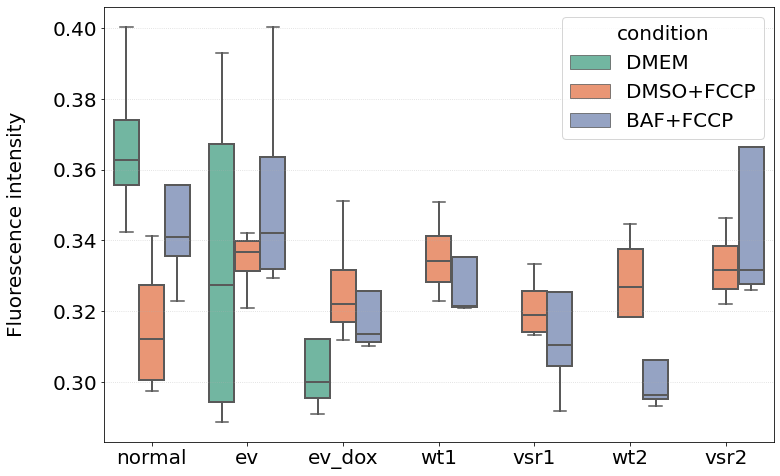

In [16]:
df_boxplot = df_ratio.melt(id_vars=["condition"], var_name="cell lines")

#graph with BAF or DMSO treatment separatly to have a better view of the cell lines
seaborn.boxplot(x="cell lines", y="value", hue = 'condition', palette = 'Set2', data = df_boxplot,
                boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2},
                showcaps=True, showfliers=False)

plt.ylabel('Fluorescence intensity\n')
plt.xlabel('')
plt.title('', x=.55)
print()

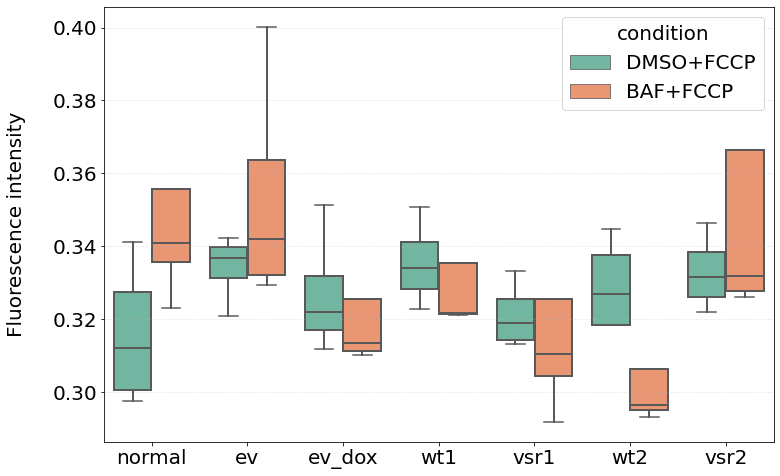

In [17]:
#without control
df_ratio_noclt = df_ratio[~df_ratio["condition"].str.contains('DMEM')]

#melt wide to long
df_boxplot = df_ratio_noclt.melt(id_vars=["condition"], var_name="cell lines")

#graph with BAF or DMSO treatment separatly to have a better view of the cell lines
seaborn.boxplot(x="cell lines", y="value", hue = 'condition', palette = 'Set2', data = df_boxplot,
                boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2},
                showcaps=True, showfliers=False)

plt.ylabel('Fluorescence intensity\n')
plt.xlabel('')
plt.title('', x=.55)
print()

In [ ]:
#Distribution: Stats for all 
all_data = [[df_ratio, 'Ratio low/high mitochondria membrane potential', '(ratio 520/590 nm)']]

column_name = df_ratio.keys()
for data_ in all_data:
    Data = data_[0]
    info = data_[1]
    info_fluo = data_[2]  
    print(info)
    
    #separation of DMSO and BAF
    df_dmso = Data[Data['condition'].str.startswith('DMSO')]
    df2_baf = Data[Data['condition'].str.startswith('BAF')]

    dfs_conditions = [[df_dmso, 'with DMSO'], [df2_baf, 'with BAF']]
    for df_ in dfs_conditions:
        data_drug = df_[0]
        drug_info = df_[1]
        print(drug_info.upper())
        
        # Mann-Whitney analysis 
        #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[3]], data_drug[column_name[4]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[3], "and", column_name[4], drug_info, 'pvalue is', Pvalue)
        
        #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[3]], data_drug[column_name[6]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[3], "and", column_name[6], drug_info, 'pvalue is', Pvalue)
        
         #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[4]], data_drug[column_name[6]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[4], "and", column_name[6], drug_info, 'pvalue is', Pvalue)
        print()